In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Upload Excel file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Arthospira.xlsx to Arthospira.xlsx


In [3]:
df = data.parse('Sheet1')
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y')
timeline_df = pd.DataFrame(data={"Year":df['Date'], "Events":df['Event'], "level":df['Level']})
# The line below is no longer needed as 'level' is now taken directly from df['Level']
# default_levels = [7, -7] * (len(timeline_df) // 2 + 1)
# default_levels = default_levels[:len(timeline_df)]
# timeline_df['level'] = default_levels

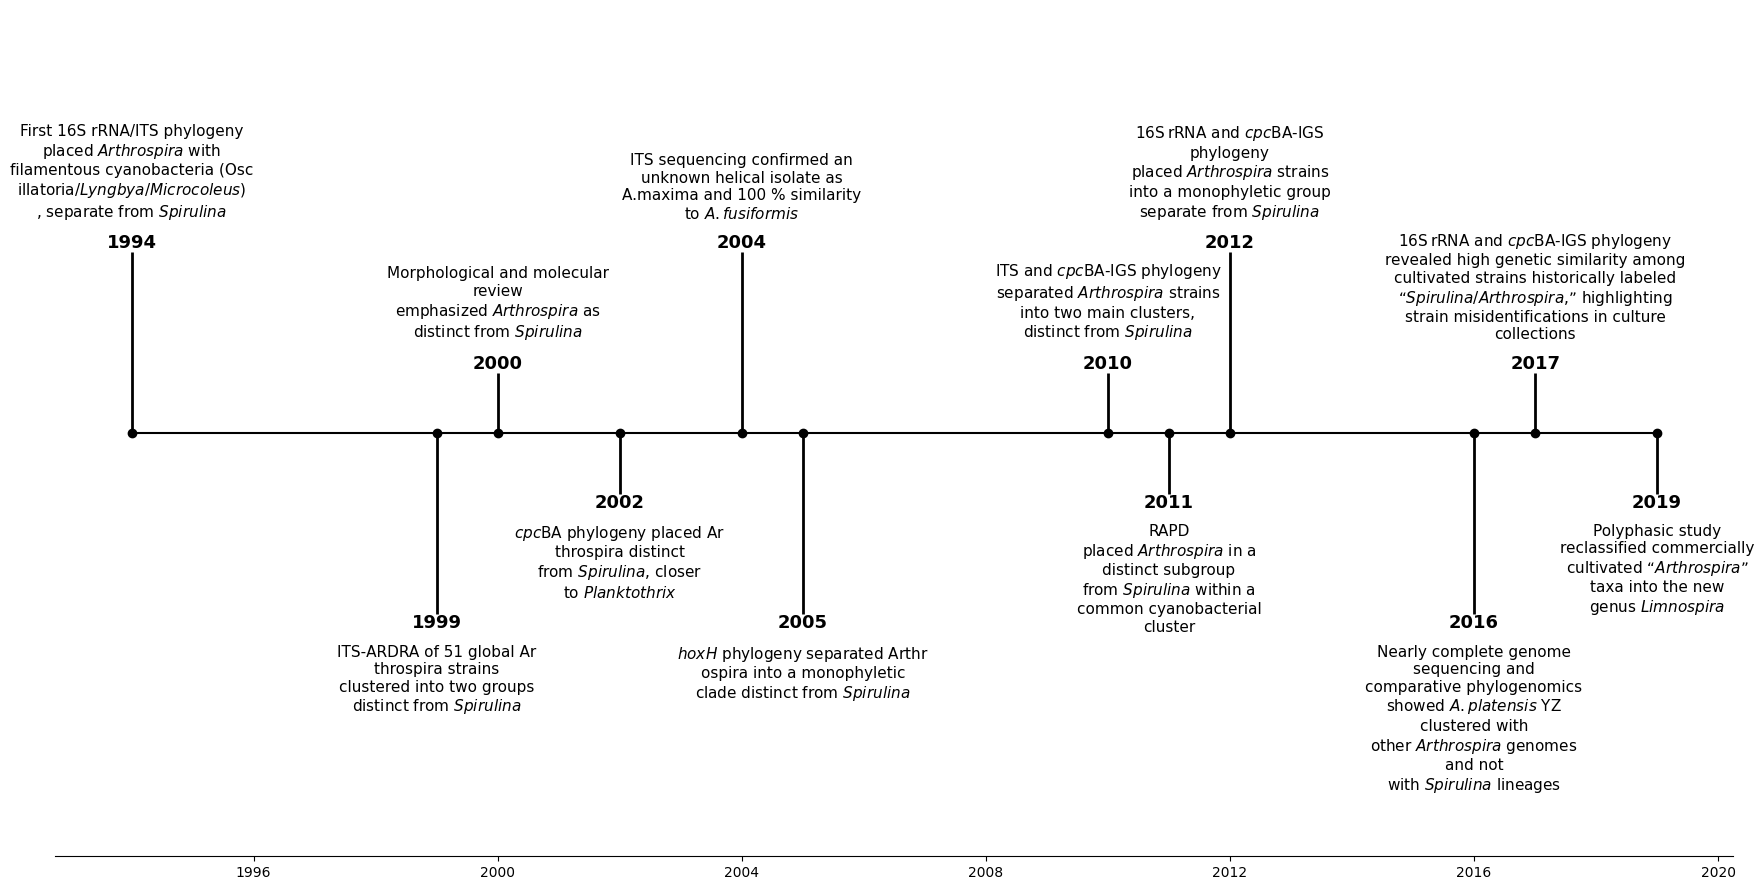

In [4]:
import textwrap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18,9))
ax.plot(df.Date, [0,]* len(timeline_df), "-o", color="black", markerfacecolor="black")
ax.set_ylim(-7,7)
ax.spines[["left","top","right"]].set_visible(False)
ax.yaxis.set_visible(False)

# Define separate widths for top and bottom text wrapping
top_text_width = 31
bottom_text_width = 25 # You can adjust this value for desired wrapping below the timeline

# Define a specific width for the year 2012
width_2012 = 10 # Adjust this value for desired wrapping in 2012

# Loop to draw events (stems, markers, and annotations)
for idx in range(len(timeline_df)):
  dt = timeline_df["Year"].iloc[idx]
  event_text = timeline_df["Events"].iloc[idx]
  text_level = timeline_df["level"].iloc[idx] # This is where the text and arrow end

  stem_color = df.loc[idx, 'Color'] # Get the specific color for this event's stem

  # Draw a marker at the point where the text is attached/stem ends
  # ax.scatter(dt, text_level, s=40, color=stem_color, zorder=3) # Removed this line to remove the marker

  # Wrap the original event text first based on text_level and year
  if dt.year == 2012:
      wrapped_text = textwrap.fill(event_text, width=30)
  elif dt.year == 2005:
      wrapped_text = textwrap.fill(event_text, width=30) # Custom width for year 2005
  elif dt.year == 2017:
      wrapped_text = textwrap.fill(event_text, width=40)
  elif dt.year == 1994:
      wrapped_text = textwrap.fill(event_text, width=30)
  elif text_level > 0:
      wrapped_text = textwrap.fill(event_text, width=top_text_width)
  else:
      wrapped_text = textwrap.fill(event_text, width=bottom_text_width)

  # Now, replace specific words with MathText for italics using raw strings
  # This is applied to the already wrapped text
  wrapped_text = wrapped_text.replace("Arthrospira", r"$\it{Arthrospira}$")
  wrapped_text = wrapped_text.replace("Limnospira", r"$\it{Limnospira}$")
  wrapped_text = wrapped_text.replace("Spirulina", r"$\it{Spirulina}$")
  wrapped_text = wrapped_text.replace("Planktothrix", r"$\it{Planktothrix}$")
  wrapped_text = wrapped_text.replace("hoxH", r"$\it{hoxH}$")
  wrapped_text = wrapped_text.replace("cpc", r"$\it{cpc}$")
  wrapped_text = wrapped_text.replace("A.platensis", r"$\it{A.platensis}$")
  wrapped_text = wrapped_text.replace("A.fusiformis", r"$\it{A.fusiformis}$")
  wrapped_text = wrapped_text.replace("Oscillatoria", r"$\it{Oscillatoria}$")
  wrapped_text = wrapped_text.replace("Lyngbya", r"$\it{Lyngbya}$")
  wrapped_text = wrapped_text.replace("Microcoleus", r"$\it{Microcoleus}$")

  # Draw the stem (vertical line)
  ax.vlines(dt, 0, text_level, color=stem_color, lw=2)

  # Determine vertical alignment and y-coordinates for separate text elements
  if text_level > 0:
      # Text is above the timeline
      year_y = text_level # Year is at the tip
      year_va = "bottom"  # Year's bottom edge is at text_level
      text_y = text_level + 0.5 # Text above the year, increased spacing for bbox
      text_va = "bottom"     # Text's bottom edge is at text_y
  else:
      # Text is below the timeline
      year_y = text_level # Year is at the tip
      year_va = "top"     # Year's top edge is at text_level
      text_y = text_level - 0.5 # Text below the year, increased spacing for bbox
      text_va = "top"  # Text's top edge is at text_y

  # bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5) # Removed bbox_props

  # Draw the bold year
  ax.text(dt, year_y, str(dt.year),
          ha="center", va=year_va, fontsize=13, fontweight='bold', color='black') # Increased fontsize for year

  # Draw the wrapped event text (non-bold, with MathText italics)
  ax.text(dt, text_y, wrapped_text,
          ha="center", va=text_va, fontsize=11, color='black') # Removed bbox_props

plt.tight_layout()
# Save the plot as a PNG file before showing it
plt.savefig('timeline_plot.png')
plt.show()